In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import nltk
pd.set_option('display.max_colwidth',100 )
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\akhil\\Desktop\\Research\\Phase 2\\Phase2data.csv", encoding = "latin-1")

In [5]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [144]:
def clean_textmain(text):
    text = text.lower()
    text ="".join([char for char in text if char not in string.punctuation ])
    text=re.sub(r'\b\w{1,4}\b', '',text)
    result = re.sub(r'[0-9]+','',text)
    tokens = re.split('\W+', result)
    words = [word for word in tokens if word.isalpha()]
    text1=[word for word in words if word not in string.digits]
    #text = [ps.stem(word) for word in text1 if word not in stopwords]
    text = [wn.lemmatize(word) for word in text1 if word not in stopwords]
    op = list(nltk.trigrams(text))
    return op

In [145]:
df['Trigram'] = df.Title.apply(clean_textmain)

In [146]:
df

,Title,Citaions,Authors,Conference,Year,Conference Name,Bigram,flagged,Trigram
0,Achieving Meaningful Privacy in Digital Systems,0,H Nissenbaum,"25th CCS 2018:\r\nToronto, ON, Canada",2018,CCS,"[(achieving, meaningful), (meaningful, privacy), (privacy, digital), (digital, system)]",0,"[(achieving, meaningful, privacy), (meaningful, privacy, digital), (privacy, digital, system)]"
1,Towards Fine-grained Network Security Forensics and Diagnosis in the SDN Era,0,"H Wang, G Yang, P Chinprutthiwong, L Xua","25th CCS 2018:\r\nToronto, ON, Canada",2018,CCS,"[(towards, finegrained), (finegrained, network), (network, security), (security, forensics), (fo...",0,"[(towards, finegrained, network), (finegrained, network, security), (network, security, forensic..."
2,vNIDS: Towards Elastic Security with Safe and Efficient Virtualization of Network Intrusion Dete...,0,"H Li, H Hu, G Gu, GJ Ahn, F Zhang","25th CCS 2018:\r\nToronto, ON, Canada",2018,CCS,"[(vnids, towards), (towards, elastic), (elastic, security), (security, efficient), (efficient, v...",0,"[(vnids, towards, elastic), (towards, elastic, security), (elastic, security, efficient), (secur..."
3,ABY 3: a mixed protocol framework for machine learning,3,"P Mohassel, P Rindal","25th CCS 2018:\r\nToronto, ON, Canada",2018,CCS,"[(mixed, protocol), (protocol, framework), (framework, machine), (machine, learning)]",1,"[(mixed, protocol, framework), (protocol, framework, machine), (framework, machine, learning)]"
4,Voting: You Can't Have Privacy without Individual Verifiability,0,"V Cortier, J Lallemand","25th CCS 2018:\r\nToronto, ON, Canada",2018,CCS,"[(voting, privacy), (privacy, without), (without, individual), (individual, verifiability)]",0,"[(voting, privacy, without), (privacy, without, individual), (without, individual, verifiability)]"
5,Securify: Practical Security Analysis of Smart Contracts,7,"P Tsankov, A Dan, DD Cohen, A Gervaisa","25th CCS 2018:\r\nToronto, ON, Canada",2018,CCS,"[(securify, practical), (practical, security), (security, analysis), (analysis, smart), (smart, ...",0,"[(securify, practical, security), (practical, security, analysis), (security, analysis, smart), ..."
6,BitML: a calculus for Bitcoin smart contracts,3,"M Bartoletti, R Zunino","25th CCS 2018:\r\nToronto, ON, Canada",2018,CCS,"[(bitml, calculus), (calculus, bitcoin), (bitcoin, smart), (smart, contract)]",0,"[(bitml, calculus, bitcoin), (calculus, bitcoin, smart), (bitcoin, smart, contract)]"
7,Large-Scale and Language-Oblivious Code Authorship Identification,0,"M Abuhamad, T AbuHmed, A Mohaisena","25th CCS 2018:\r\nToronto, ON, Canada",2018,CCS,"[(largescale, languageoblivious), (languageoblivious, authorship), (authorship, identification)]",0,"[(largescale, languageoblivious, authorship), (languageoblivious, authorship, identification)]"
8,Fraud De-Anonymization for Fun and Profit,0,"N Hernandez, M Rahman, R Recabarrena","25th CCS 2018:\r\nToronto, ON, Canada",2018,CCS,"[(fraud, deanonymization), (deanonymization, profit)]",0,"[(fraud, deanonymization, profit)]"
9,"Unveiling Hardware-based Data Prefetcher, a Hidden Source of Information Leakage",0,"Y Shin, HC Kim, D Kwon, JH Jeong, J Hur","25th CCS 2018:\r\nToronto, ON, Canada",2018,CCS,"[(unveiling, hardwarebased), (hardwarebased, prefetcher), (prefetcher, hidden), (hidden, source)...",0,"[(unveiling, hardwarebased, prefetcher), (hardwarebased, prefetcher, hidden), (prefetcher, hidde..."


In [22]:
test = ('machine', 'learning')

In [24]:
df['flagged'] = df['Bigram'].apply(lambda x: 1 if test in x else 0)

In [29]:
df_2 = df.where(df['flagged'] == 1).dropna()

In [31]:
# Directly use citation as weight.

In [33]:
df_2['Year'].unique()

array([2018., 2017., 2016., 2008., 2010., 2015., 2014., 2013., 2012.,
       2011., 2009., 2006., 2005., 2004., 2003., 2002., 2001., 2000.,
       1998., 1997., 1996., 1995., 1994., 1993., 1991., 1990., 1989.,
       2007., 1999.])

In [135]:
df_2018 = df_2.groupby('Year').get_group(2015)

In [136]:
from collections import defaultdict
d = defaultdict(int)
for x,y in zip(df_2018['Bigram'], df_2018['Citaions']):
    for item in x:
        if item == test:
            continue
        d[item] += y

In [137]:
data = {'x':list(d.keys()), 'y': list(d.values())}

In [138]:
plot_d = pd.DataFrame(data)

In [139]:
zz = plot_d.sort_values(by=['y'], ascending=False)

In [140]:
zz = zz.head(10)

In [141]:
zz['x1'] = zz['x'].apply(lambda x: ' '.join(x))

Text(0.5,1,'Topic : Machine Learniing - 2015')

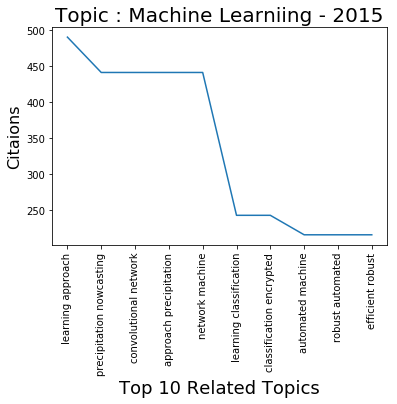

In [143]:
plt.plot(zz['x1'], zz['y'])
plt.xticks(rotation=90)
plt.xlabel('Top 10 Related Topics', fontsize=18)
plt.ylabel('Citaions', fontsize=16)
plt.title('Topic : Machine Learniing - 2015', fontsize=20)